In [3]:
import pandas as pd

In [4]:
lcn=pd.read_csv(r"C:\Users\Vaibhav A. Ghorpade\Desktop\dataset\LungCap.csv")

In [5]:
lcn.head()

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no


Understand the problem statement/requirement


To build the predictive model which can predict lung capacity

In [6]:
lcn.isnull().sum()

LungCap      0
Age          0
Height       0
Smoke        0
Gender       0
Caesarean    0
dtype: int64

In [7]:
lcn.Smoke=lcn.Smoke.replace({"no":0,"yes":1})
lcn.Gender=lcn.Gender.replace({"female":0,"male":1})
lcn.Caesarean=lcn.Caesarean.replace({"no":0,"yes":1})

In [8]:
lcn.head()

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,0,1,0
1,10.125,18,74.7,1,0,0
2,9.550,16,69.7,0,0,1
3,11.125,14,71.0,0,1,0
4,4.800,5,56.9,0,1,0


In [9]:
#splitting the data into train and test data

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
lcn_train,lcn_test=train_test_split(lcn,test_size=0.2)

In [12]:
lcn_train_x=lcn_train.iloc[: ,1::]
lcn_test_x=lcn_test.iloc[: ,1::]

In [13]:
lcn_train_y=lcn_train.iloc[: ,0]
lcn_test_y=lcn_test.iloc[: ,0]

In [14]:
#Model Building 

In [15]:
#import the necessory function from sk learn
#create a object of that function
#run the fit function and model is created
#run the prediction function( prediction is true)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
linreg=LinearRegression()

In [18]:
linreg.fit(lcn_train_x,lcn_train_y)

LinearRegression()

In [19]:
Rsquare=linreg.score(lcn_train_x,lcn_train_y)

In [20]:
Rsquare

0.8548213123603734

In [21]:
N=lcn_train_x.shape[0]
K=lcn_train_x.shape[1]

In [22]:
Adj_Rsquare=1-((1-Rsquare)*(N-1)/(N-K-1))

In [23]:
Adj_Rsquare

0.8535566896457425

In [24]:
lcn_train_x.columns

Index(['Age', 'Height', 'Smoke', 'Gender', 'Caesarean'], dtype='object')

In [25]:
linreg.coef_      #B1,B2,B3,B4,B5

array([ 0.15034792,  0.27312449, -0.62667271,  0.41462994, -0.24545976])

In [26]:
linreg.intercept_ #Bo

-11.812211767955336

In [27]:
pred_train=linreg.predict(lcn_train_x)
pred_test=linreg.predict(lcn_test_x)

In [28]:
pred_train

array([ 9.9323416 ,  4.11233408,  6.93920865,  6.12451948,  6.46111134,
        5.70078818,  5.92838913, 12.43498974, 11.58371289,  7.62696308,
       10.82355522,  5.91486235,  7.16274484,  6.7481149 , 11.39659888,
        8.4739079 ,  5.49607425,  3.14694471, 11.67024115,  7.03961598,
        7.49924331,  4.3851063 ,  4.43947231,  6.65724168, 10.86413556,
        4.90430172,  5.68267048,  5.15453919,  7.73647177, 13.0493904 ,
        7.48748904,  5.88806768,  3.01948382, 10.64589486,  8.50980394,
        7.01230353,  6.61155265,  5.190953  ,  9.77111981,  9.5479359 ,
        9.67148915,  8.48743468, 11.86178058,  5.67347573,  7.60823422,
        9.63658896,  7.84103726,  9.18412498,  5.72341632,  6.46137023,
       11.29645044,  9.69915388,  6.45226887,  8.58325109,  6.09278161,
        8.4145987 ,  9.93551228,  4.99066449, 12.38036484,  6.47489701,
        4.99092338,  3.45596524,  5.87402312,  8.54180069, 10.69557656,
        9.34348087, 11.6015717 ,  5.36861336,  3.89816651,  5.87

In [29]:
pred_test

array([ 6.16596988,  6.92568187,  5.41122511, 11.73319075,  5.05439075,
        8.1464174 ,  2.66425648,  4.1119818 ,  2.84217574,  5.78298441,
        7.3902524 ,  4.38953171,  7.22737355,  7.77262669,  8.57847339,
       13.24057755,  6.69365549,  7.43083274,  9.26622783,  5.64173786,
        7.87251624,  6.45252776,  6.51776764,  2.03597676,  3.95279141,
        4.02978556, 10.92760293,  7.78589458,  4.84057546,  9.41163255,
       10.90090165,  4.89494147, 10.74135898,  5.4638186 ,  7.63615784,
        7.81549732,  8.03664982,  4.48551362,  2.52760085, 11.93083472,
        9.67591457,  4.63065945,  7.88222877,  8.59694337, 10.88650481,
       12.35305239,  4.65823079, 11.12373328,  8.8562822 ,  8.43280979,
        5.30549827,  5.61442541,  7.40846349,  7.43109163,  5.73720199,
        8.87926262,  7.69511476,  6.25639741,  9.30680817,  8.59642559,
        6.91658051,  5.1231536 ,  7.77705211,  8.48726919,  8.03196552,
       11.46500945,  6.91632162,  7.99555171,  9.9303102 ,  3.48

In [30]:
error_test=lcn_test_y-pred_test

In [31]:
error_test

275    1.234030
690   -2.500682
66    -0.036225
373   -1.008191
58    -0.429391
         ...   
31    -0.503096
681   -0.843264
388    0.261300
384    1.276050
349    1.439457
Name: LungCap, Length: 145, dtype: float64

In [32]:
import numpy as np

In [33]:
MSE=np.mean(np.square((error_test)))
MSE

0.9363351511333223

In [34]:
RMSE=np.sqrt(MSE)
RMSE

0.9676441242178461

In [35]:
MAPE=np.mean(np.abs(error_test*100/lcn_test_y))
MAPE

11.128630007373447

In [36]:
#lets Check the assumptions on train data

In [37]:
error_train=lcn_train_y-pred_train

In [38]:
np.mean(error_train)

4.326041440780782e-15

In [39]:
import matplotlib.pyplot as plt

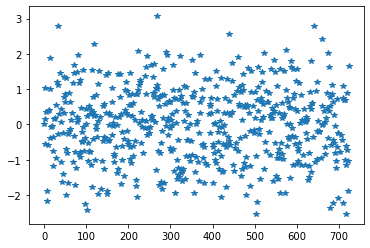

In [40]:
plt.plot(error_train,"*")

(array([ 4.,  4.,  7., 10., 15., 14., 20., 23., 30., 29., 35., 36., 30.,
        35., 45., 43., 38., 36., 34., 21., 15., 22., 12.,  8.,  8.,  1.,
         1.,  1.,  2.,  1.]),
 array([-2.53735345, -2.35060465, -2.16385585, -1.97710706, -1.79035826,
        -1.60360946, -1.41686067, -1.23011187, -1.04336307, -0.85661428,
        -0.66986548, -0.48311668, -0.29636788, -0.10961909,  0.07712971,
         0.26387851,  0.4506273 ,  0.6373761 ,  0.8241249 ,  1.0108737 ,
         1.19762249,  1.38437129,  1.57112009,  1.75786888,  1.94461768,
         2.13136648,  2.31811527,  2.50486407,  2.69161287,  2.87836167,
         3.06511046]),
 <BarContainer object of 30 artists>)

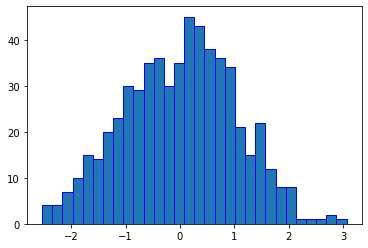

In [41]:
plt.hist(error_train,bins=30,edgecolor="b")

In [42]:
pred_actual_df=pd.DataFrame()

In [43]:
pred_actual_df["Actual"]=lcn_train_y
pred_actual_df["Predicted"]=pred_train

In [44]:
pred_actual_df.head()

,Actual,Predicted
29,10.475,9.932342
169,4.325,4.112334
45,6.700,6.939209
314,6.500,6.124519
592,8.025,6.461111


In [45]:
import seaborn as sns

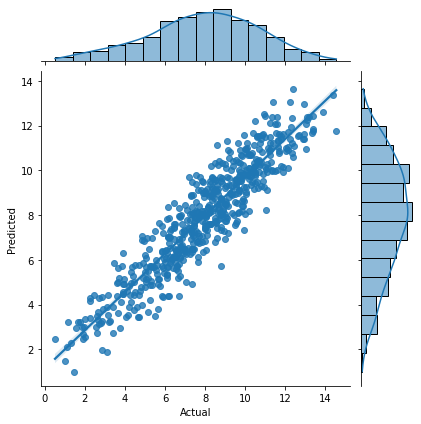

In [46]:
sns.jointplot(x="Actual",y="Predicted",data=pred_actual_df, kind="reg")

In [51]:
#Program to remove outliers
def remove_outliers(df,col,k):
    mean=df[col].mean()
    global df1
    std=df[col].std()
    final_list=[x for x in df[col] if ((x>mean-k*std) and (x<mean+k*std))]
    df1=df.loc[df[col].isin(final_list)];
    print(df1.shape)
    print("Numbers of Outliers removed-->",df.shape[0]-df1.shape[0])


In [52]:
remove_outliers(lcn,"LungCap",2)

(695, 6)
Numbers of Outliers removed--> 30
